## Advanced Data Augmentation with Keras

- 한정된 이미지 데이터를 무작위로 변형(augmentation)해서 데이터의 수와 다양성을 늘려,
딥러닝 모델의 일반화 성능을 높이고 과적합(overfitting)을 방지

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 146s 1us/step


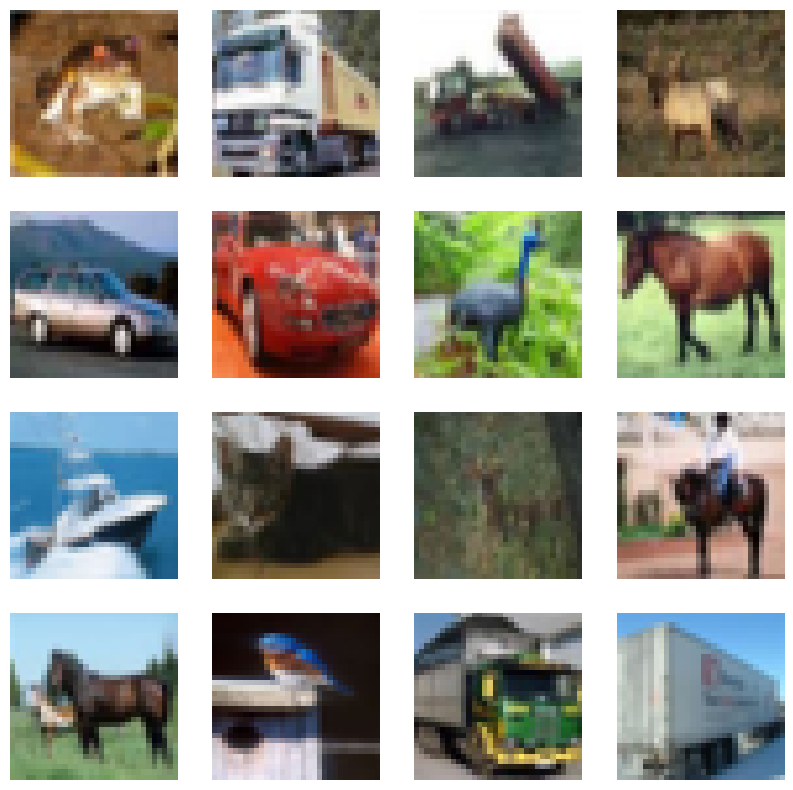

In [1]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 dataset for training images
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values for augmentation
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Display a sample of the training images
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

In [2]:
from PIL import Image, ImageDraw

# Create a blank white image
image = Image.new('RGB', (224, 224), color = (255, 255, 255))

# Draw a red square
draw = ImageDraw.Draw(image)
draw.rectangle([(50, 50), (174, 174)], fill=(255, 0, 0))

# Save the image
image.save('sample.jpg')

파라미터	설명
- rotation_range	이미지 회전 범위 (예: 40이면 -40도~+40도 사이로 회전)
- width_shift_range	좌우 이동 범위 (비율 또는 픽셀 수)
- height_shift_range	상하 이동 범위
- shear_range	기울기 변화 (shearing transformation)
- zoom_range	확대/축소 비율 범위
- horizontal_flip	좌우 반전 허용 여부
- fill_mode	이동/회전 등으로 생긴 빈 영역을 어떻게 채울지 ('nearest', 'constant', 'reflect', 'wrap')


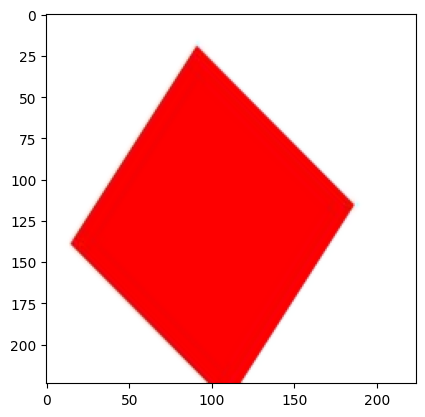

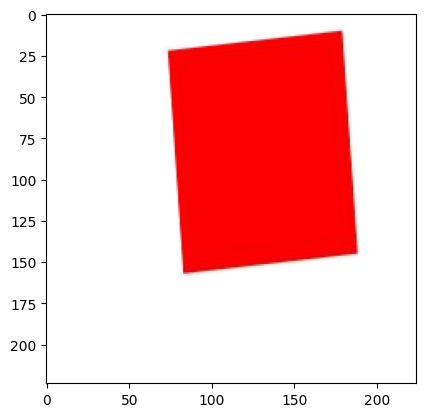

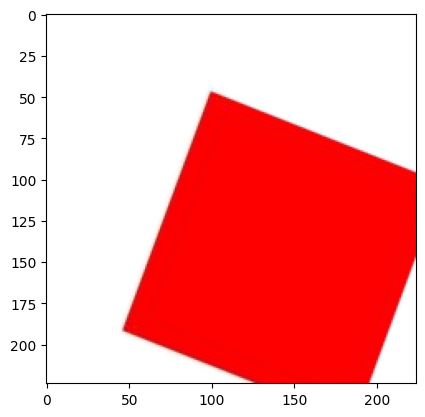

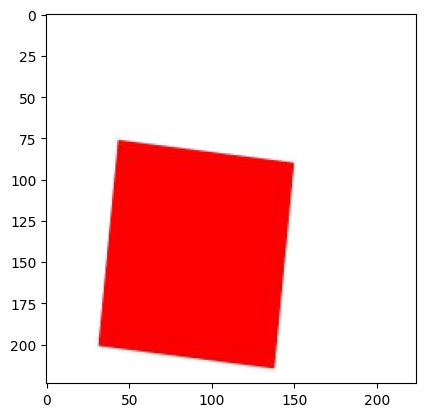

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Load the sample image
img_path = 'sample.jpg'
img = load_img(img_path)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Create an instance of ImageDataGenerator with basic augmentations
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate batches of augmented images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break

plt.show()

옵션	설명
- featurewise_center=True	전체 데이터셋의 평균을 각 입력에서 뺍니다.
- featurewise_std_normalization=True	전체 데이터셋의 표준편차로 나눕니다.
- samplewise_center=True	각 이미지의 평균을 해당 이미지에서 뺍니다.
- samplewise_std_normalization=True	각 이미지의 표준편차로 나눕니다.

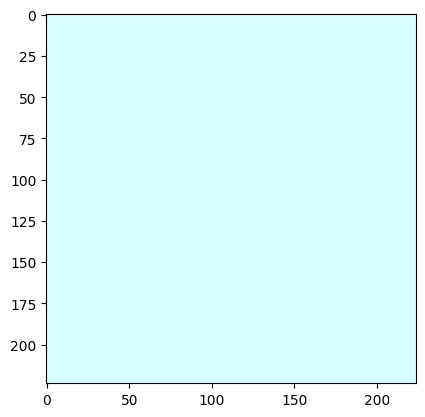

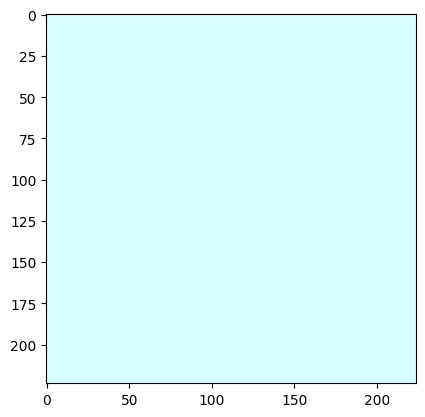

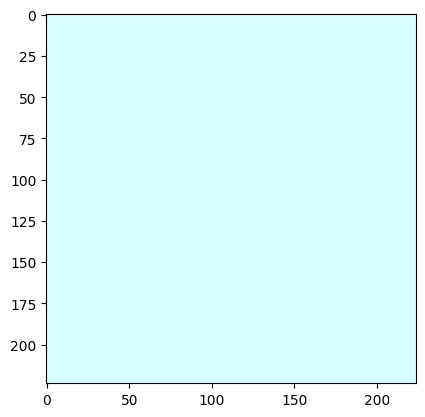

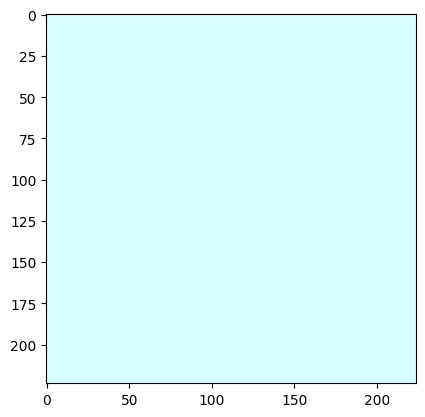

In [5]:
# Create an instance of ImageDataGenerator with normalization options
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    samplewise_center=True,
    samplewise_std_normalization=True
)

# Load the sample image again and fit the generator (normally done on the training set)
datagen.fit(x)

# Generate batches of normalized images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break

plt.show()

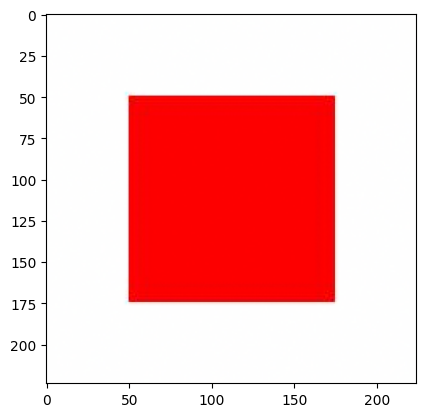

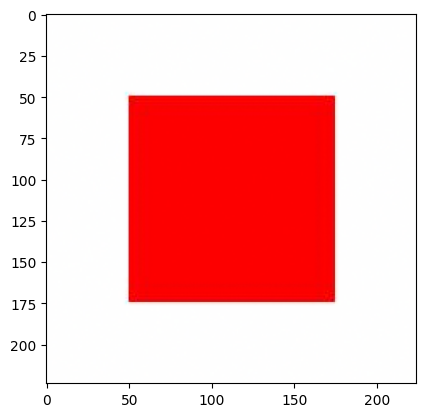

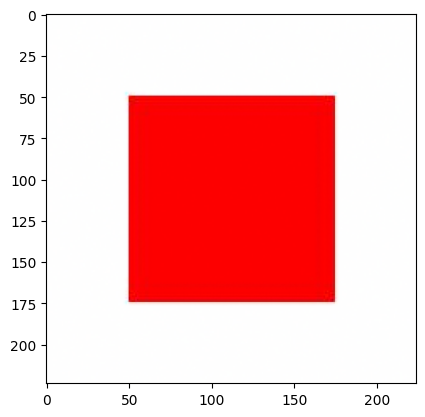

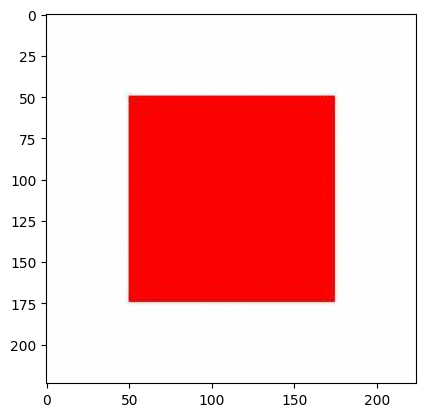

In [6]:
# Define a custom data augmentation function
def add_random_noise(image):
    noise = np.random.normal(0, 0.1, image.shape)
    return image + noise

# Create an instance of ImageDataGenerator with the custom augmentation
datagen = ImageDataGenerator(preprocessing_function=add_random_noise)

# Generate batches of augmented images with noise
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break

plt.show()

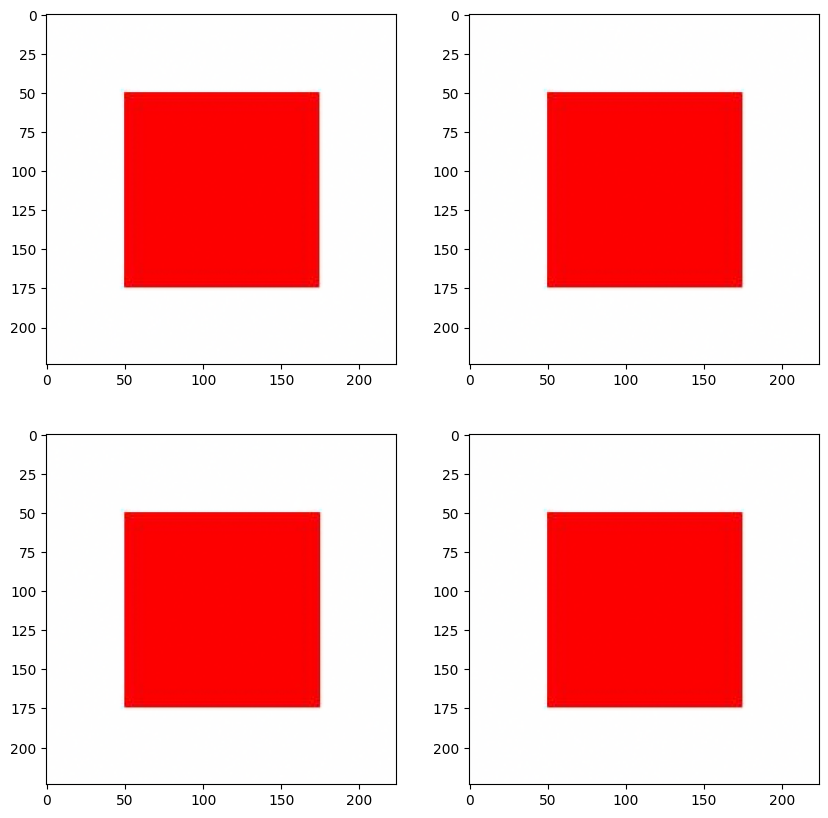

In [7]:
# Visualizing multiple augmented versions of the same image
plt.figure(figsize=(10, 10))
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    if i >= 4:  # Show only 4 versions
        break
    plt.subplot(2, 2, i+1)
    plt.imshow(batch[0].astype('uint8'))
plt.show()


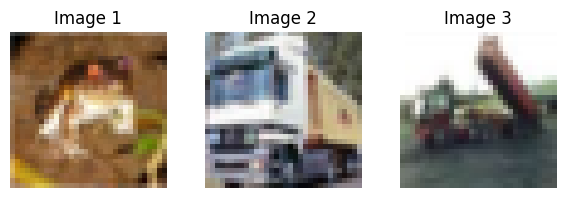

In [10]:
training_images = x_train[:3]

plt.figure(figsize=(6, 2))  
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(training_images[i])
    plt.title(f"Image {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()

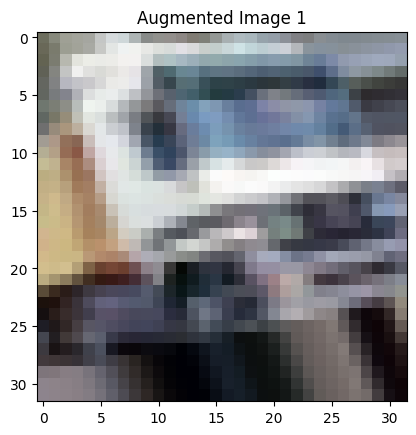

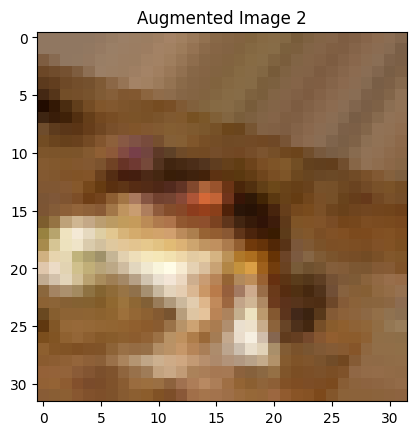

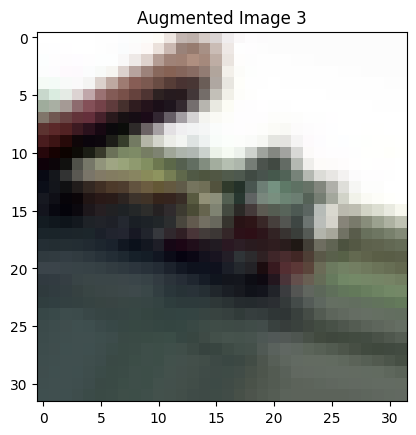

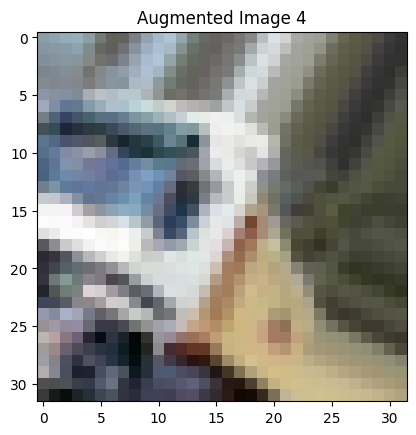

In [9]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img  

import matplotlib.pyplot as plt  

import numpy as np  

 

# Define the augmentation parameters  

datagen = ImageDataGenerator(  

    rotation_range=40,  

    width_shift_range=0.2,  

    height_shift_range=0.2,  

    shear_range=0.2,  

    zoom_range=0.2,  

    horizontal_flip=True,  

    fill_mode='nearest'  

)  



training_images = x_train[:3] 


# Generate and visualize augmented images  

i = 0  

for batch in datagen.flow(training_images, batch_size=1):  

    plt.figure(i)  

    imgplot = plt.imshow(array_to_img(batch[0]))  

    plt.title(f'Augmented Image {i + 1}')  

    i += 1  

    if i % 4 == 0:  

        break  

plt.show()  

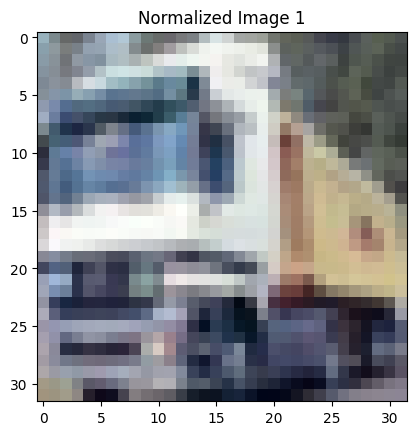

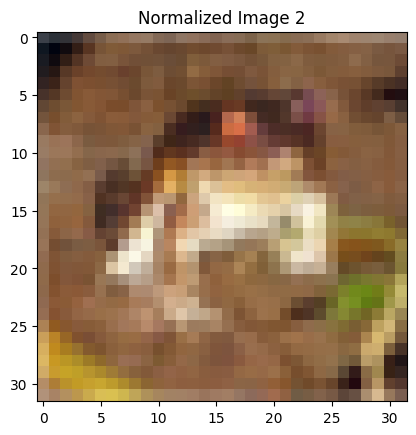

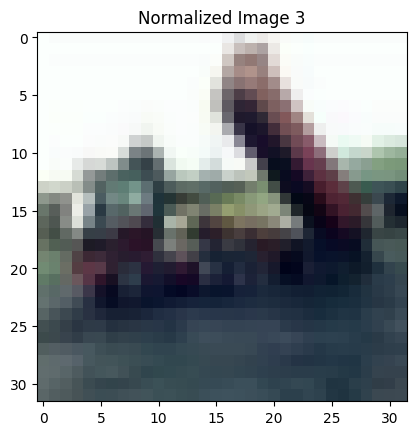

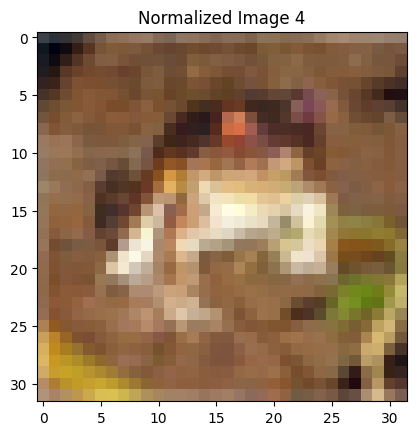

In [11]:
# Create an instance of ImageDataGenerator with normalization options  

datagen = ImageDataGenerator(  

    featurewise_center=True,  

    featurewise_std_normalization=True,  

    samplewise_center=True,  

    samplewise_std_normalization=True  

)  

 

# Fit the ImageDataGenerator to the dataset  

datagen.fit(training_images)  

 

# Generate and visualize normalized images  

i = 0  

for batch in datagen.flow(training_images, batch_size=1):  

    plt.figure(i)  

    imgplot = plt.imshow(array_to_img(batch[0]))  

    plt.title(f'Normalized Image {i + 1}')  

    i += 1  

    if i % 4 == 0:  

        break  

plt.show()  

이 코드에서는 "정규화(normalization)"를 수행하고 있습니다.
정규화는 사람 눈에 큰 차이가 없어 보여도, 모델이 학습하기 훨씬 더 쉬워지도록 데이터를 수치적으로 정리해주는 과정이에요.

🔍 정규화 vs 데이터 증강의 차이

**정규화(Normalization)**	이미지의 평균/표준편차를 맞추거나, 값 범위를 정리해서 학습 안정성 향상	거의 차이 없음 (흐릿하거나 약간 밝기 변화 있을 수 있음)	✅ 계산이 편해지고 수렴이 빨라짐

**증강(Augmentation)**	회전, 확대, 반전 등 시각적으로 "새 이미지처럼" 만들어서 데이터 다양성 향상	차이 명확함 (새로운 이미지처럼 보임)	✅ 과적합 방지, 일반화 향상

🧠 왜 정규화가 중요한가?
이미지 픽셀 값은 보통 0~255 범위예요.

모델은 이런 큰 수보다 평균이 0에 가깝고, 분산이 작은 숫자로 입력받을 때 더 안정적으로 학습합니다.

특히 딥러닝은 weight 업데이트가 작은 변화에 민감하므로, 입력의 분포를 정규화해주는 게 중요해요.


하지만 시각화할 땐 다시 0~255 범위로 맞추거나 array_to_img() 같은 변환을 해줘야 눈에 잘 보여요.

✅ 결론
네, 이 코드에서 만들어진 정규화된 이미지는 사람이 봤을 땐 거의 차이 없어 보이지만,
모델 입장에서는 훨씬 더 계산하기 쉽고 학습하기 좋은 형태로 바뀐 거예요.

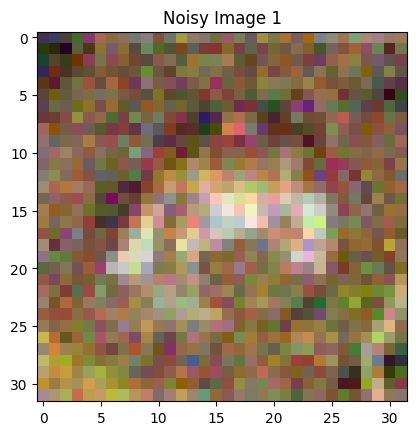

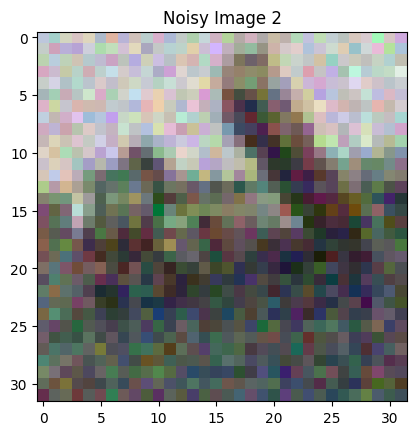

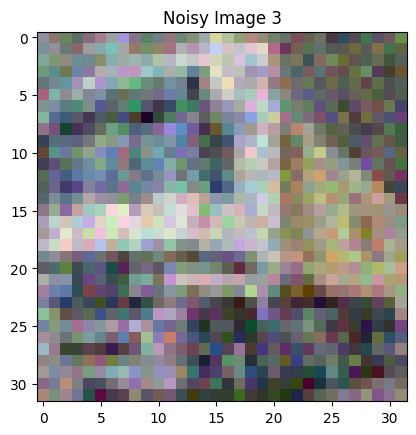

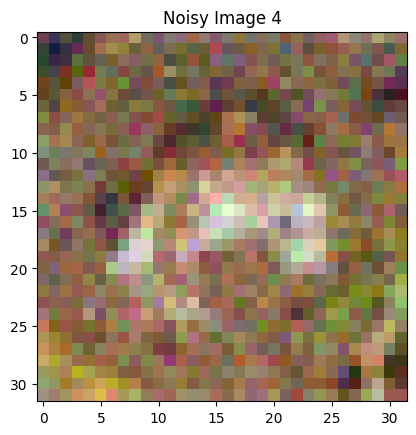

In [12]:
# Define a custom augmentation function to add random noise  

def add_random_noise(image):  

    noise = np.random.normal(0, 0.1, image.shape)  

    return image + noise  

 

# Create an instance of ImageDataGenerator with custom augmentation  

datagen = ImageDataGenerator(preprocessing_function=add_random_noise)  

 

# Generate and visualize augmented images  

i = 0  

for batch in datagen.flow(training_images, batch_size=1):  

    plt.figure(i)  

    imgplot = plt.imshow(array_to_img(batch[0]))  

    plt.title(f'Noisy Image {i + 1}')  

    i += 1  

    if i % 4 == 0:  

        break  

plt.show()  